In [4]:
# Third party
import importlib
import torch
import matplotlib.pyplot as plt

# User
import base.abstract
import base.mlp
import base.train
import base.encode
import base.pre_process
import base.viz
import model

importlib.reload(base.abstract)
importlib.reload(base.mlp)
importlib.reload(base.train)
importlib.reload(base.encode)
importlib.reload(base.pre_process)
importlib.reload(base.viz)
importlib.reload(model)

from base.train import sgd
from base.encode import get_encoder_decoder
from base.train import sgd
from base.viz import plot_2d_char_embedding
from base.pre_process import get_dataset
from model import RNN
from layer import RecurrentLayer

In [5]:
encoder, decoder = get_encoder_decoder(training_data="../data/shakespear.txt", type='character')
# let's now encode the entire text dataset and store it into a torch.Tensor
with open("../data/shakespear.txt", 'r', encoding='utf-8') as f:
    text = f.read()
text_encoded = torch.tensor(encoder(text), dtype=torch.long)
unique_chars = sorted(list(set(text)))


In [6]:
token_length = 3
dataset =  get_dataset(text_encoded, 3, context_window="fixed")
train_data, train_targets = dataset["train"]
validation_data, validation_targets = dataset["validation"]
len(train_data), len(validation_data), train_targets

(948085, 167309, tensor([18, 47, 56,  ..., 57,  1, 21]))

In [7]:
hp = {
    "init_learning_rate": .1,
    "converging_learning_rate": .01,
    "epochs": 100000,
    "dim_of_embedding": 2,
    "num_layer_1_nodes": 10,
    "mini_batch_size": 3,
    "token_length": token_length
}

params = {
    "num_of_unique_chars": len(unique_chars)
}

l1 = RecurrentLayer(
    num_of_inputs=hp['dim_of_embedding'],
    num_of_neurons=hp['num_layer_1_nodes'],
    activation_func=torch.tanh,
)
l2 = RecurrentLayer(
    num_of_inputs=hp['num_layer_1_nodes'],
    num_of_neurons=len(unique_chars),
)

model = RNN(hp,[l1,l2], **params)

In [8]:
loss_list = []
model.require_grad()
sgd(hp, model, train_data, train_targets, loss_list)

epoch: 0 / 100000, loss: 19.2522
epoch: 10000 / 100000, loss: 4.9781
epoch: 20000 / 100000, loss: 3.4163
epoch: 30000 / 100000, loss: 4.2042
epoch: 40000 / 100000, loss: 2.2679
epoch: 50000 / 100000, loss: 3.4287
epoch: 60000 / 100000, loss: 3.9686
epoch: 70000 / 100000, loss: 2.7847
epoch: 80000 / 100000, loss: 2.6518
epoch: 90000 / 100000, loss: 1.9118


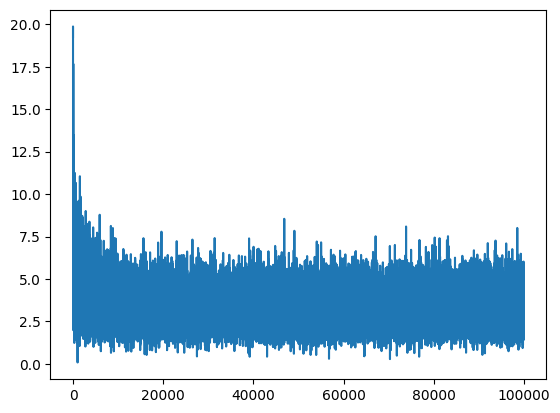

In [9]:
plt.plot(loss_list)

In [10]:
# Compute negative log likelihood of the train/validation

print(f"train loss: {model.dataset_loss(train_data,train_targets)}")
print(f"validation loss: {model.dataset_loss(validation_data, validation_targets)}" )


train loss: 3.12713461730865
validation loss: 3.127634670976709


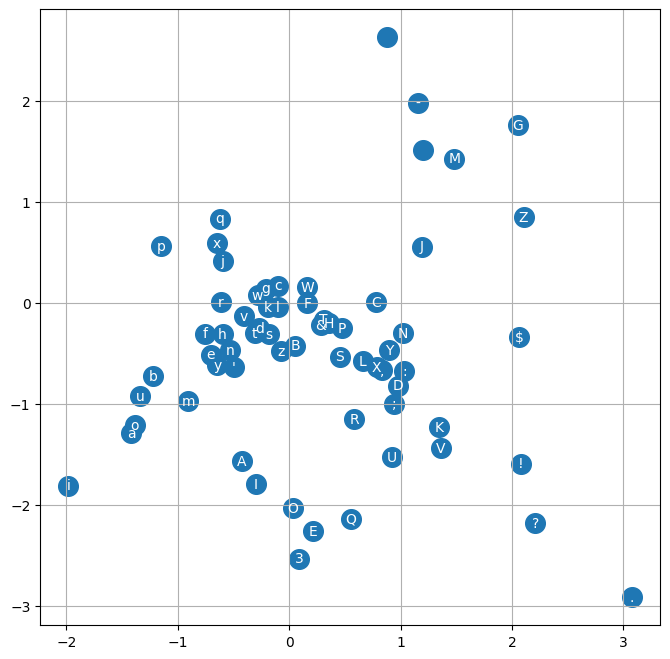

In [11]:
plot_2d_char_embedding(unique_chars, model.embedding)


In [12]:
decoder(model.generate(200))


"mOdkA\n'\noe kho'etgi,pnnf..I\n\nRUARAOC\n\npAop nhys.\niCyii'k. y on  oa ziuy, pa  hsr oi nem sit oy  h esag eeahe  emdsiknn,si\n orvbn, HyA\n\nar,h\nepa yesdk\nnfsd.\nRRAE\n\nOvR\n yLay. eaai.hMRrKCfRTRn\nOn ReHeklm"